In [12]:
import numpy as ny
import matplotlib.pyplot as pt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

# Here, we import the required libraries for our CNN implementation. 
# numPy is a library for numerical computing, matplotlib is a library for
# plotting graphs, keras is a high-level neural networks API for Python, 
# # and the rest of the imports are specific Keras modules for building and training our CNN.

In [15]:
(x_tr, y_tr), (x_tst, y_tst) = cifar10.load_data()

# Here, we load the CIFAR-10 dataset, which is a popular image classification dataset consisting of 
# 50,000 training images and 10,000 test images of size 32x32 pixels, with 10 different classes of objects. 
# The data is divided into training and testing sets, with the training set being used to train the CNN 
# and the testing set being used to evaluate its performance.

In [16]:
x_tr = x_tr.astype('float32') / 255
x_tst = x_tst.astype('float32') /255

# Here, we normalize the pixel values of the input images to lie between 0 and 1 by 
# dividing each pixel value by 255 (the maximum pixel value).

In [17]:
y_tr = keras.utils.to_categorical(y_tr, 10)
y_tst = keras.utils.to_categorical(y_tst, 10)

In [43]:
model_cnn = Sequential()

# Here, we perform one-hot encoding of the class labels. One-hot encoding is a technique 
# used to represent categorical data as numerical data, where each class is represented 
# as a binary vector with a 1 in the position corresponding to the class label and 0s elsewhere.

In [22]:
model_cnn.add(Conv2D(32,(3, 3), padding= "same", activation="relu", input_shape=x_tr.shape[1:]))

In [23]:
model_cnn.add(Conv2D(32, (3, 3), activation="relu"))

In [24]:
model_cnn.add(MaxPool2D(pool_size=(2,2)))

In [25]:
model_cnn.add(Dropout(0.25))

In [26]:
model_cnn.add(Flatten())

In [27]:
model_cnn.add(Dense(512, activation="relu"))

In [28]:
model_cnn.add(Dropout(0.5))

In [29]:
model_cnn.add(Dense(10, activation="softmax"))

In [44]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Here, we define the architecture of our CNN. We use the Sequential class from Keras to define a linear stack of layers. 
# We start with two Conv2D layers with 32 and 64 filters respectively, followed by MaxPooling2D layers to reduce 
# the spatial dimensions of the feature maps. We then add Dropout layers to regularize the model and prevent overfitting. 
# We then flatten the output of the convolutional layers into a 1D vector using Flatten, 
# followed by two fully connected Dense layers with 512 and 10 units respectively.
# The last layer uses the softmax activation function to output a probability distribution over the 10 classes.

In [32]:
hist_cnn = model_cnn.fit(x_tr, y_tr, batch_size=64, epochs=10, validation_data=(x_tst, y_tst), shuffle=True)

Epoch 1/10
782/782 [==============================] - 88s 111ms/step - loss: 1.4967 - accuracy: 0.4615 - val_loss: 1.1501 - val_accuracy: 0.6036
Epoch 2/10
782/782 [==============================] - 95s 121ms/step - loss: 1.1278 - accuracy: 0.5989 - val_loss: 1.0352 - val_accuracy: 0.6338
Epoch 3/10
782/782 [==============================] - 92s 117ms/step - loss: 0.9871 - accuracy: 0.6511 - val_loss: 0.9607 - val_accuracy: 0.6617
Epoch 4/10
782/782 [==============================] - 105s 134ms/step - loss: 0.8838 - accuracy: 0.6892 - val_loss: 0.8996 - val_accuracy: 0.6905
Epoch 5/10
782/782 [==============================] - 96s 123ms/step - loss: 0.8060 - accuracy: 0.7151 - val_loss: 0.8856 - val_accuracy: 0.6935
Epoch 6/10
782/782 [==============================] - 98s 125ms/step - loss: 0.7320 - accuracy: 0.7417 - val_loss: 0.8458 - val_accuracy: 0.7062
Epoch 7/10
782/782 [==============================] - 102s 131ms/step - loss: 0.6686 - accuracy: 0.7628 - val_loss: 0.8521 - val_

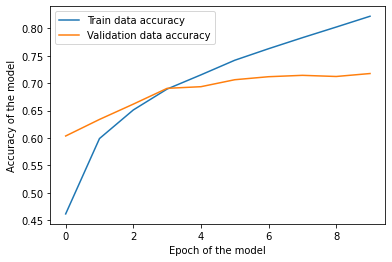

In [40]:
pt.plot(hist_cnn.history['accuracy'], label='Train data accuracy')
pt.plot(hist_cnn.history['val_accuracy'], label='Validation data accuracy')
pt.xlabel('Epoch of the model')
pt.ylabel('Accuracy of the model')
pt.legend()
pt.show()

In [42]:
score = model.evaluate(x_tst, y_tst, verbose=0)
print('Test data Loss:', score[0])
print('Test data Accuracy:', score[1])

Test data Loss: 0.859925389289856
Test data Accuracy: 0.7174999713897705
